## Grade Analysis and Prediction <H3> special thanks to Amin and Jishaan for data collection</H3> 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from collections import Counter

In [2]:
train_data = pd.read_csv('/Users/aggarwalpiush/Documents/learning_analytics/Grades_dataset_final.tsv', engine='python',sep='\t',
                        dtype={'Grade': 'category',  'Id': np.int32,
                              'Name': 'category',
                              'Semestr':'category',
                              'Department':'category',
                              'Sub-Department':'category',
                              'Subject':'category',
                               'Learning Source':'category',
                               'Evaluation':'category',
                               'Susb-continent':'category',
                               'Country' : 'category'
                              })

train_data.Semestr = train_data['Semestr'].str.rstrip('nd''st''th' ' ''r').replace(' 2','2').values
train_data['Learning Source'] = train_data['Learning Source'].str.rstrip(' ').replace(' Lecture','Lecture').replace('Lectures','Lecture').replace(' Class Lectures','Lecture').values
train_data['Department'] = train_data['Department'].str.rstrip(' ').replace('Enginnering','Engineering').replace('Ingenieurwissenschaften','Engineering').values
print(train_data.columns)

Index(['ID', 'Name', 'Semestr', 'Department', 'Sub-Department ', 'Subject',
       'Grade', 'Learning Source', 'Evaluation', 'Susb-continent', 'Country'],
      dtype='object')


In [3]:
train_data.head(3)

,ID,Name,Semestr,Department,Sub-Department,Subject,Grade,Learning Source,Evaluation,Susb-continent,Country
0,1,Khan,2,Engineering,Computer Enginnering,Advanced Web Tech,"1,3",Online,Good,Asia,Pakistan
1,1,Khan,2,Engineering,Computer Enginnering,Distributed System,"2,3","Vedio, Lecture",Good,Asia,Pakistan
2,2,Moloud Kordestani,4,Engineering,Information Enginnering,Information Enginnering,3,Lecture,Good,Asia,Iran


## Visualize data

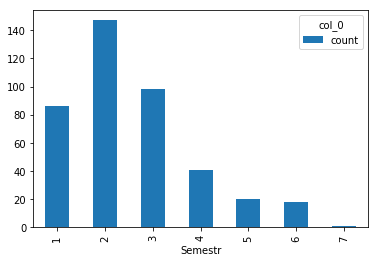

In [4]:
my_tab = pd.crosstab(index = train_data["Semestr"],  # Make a crosstab
                              columns="count")
my_tab.plot.bar()

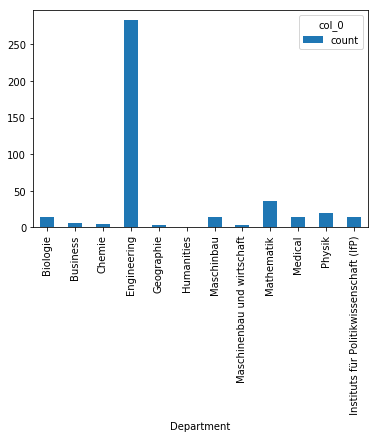

In [5]:
my_tab = pd.crosstab(index = train_data["Department"],  # Make a crosstab
                              columns="count")
my_tab.plot.bar()

In [6]:
Counter(train_data["Learning Source"].values)

Counter({'Online': 1,
         'Vedio, Lecture': 1,
         'Lecture': 393,
         'Seminar': 2,
         'E-Learning, PDF-Dateien': 2,
         'PDF-Dateien': 4,
         'PDF-Dateien, Karteikarten': 2,
         'PDF-Dateien, Anwesenheit': 2,
         'Anwesenheit, K-Karten': 2,
         'Anwesenheit': 2})

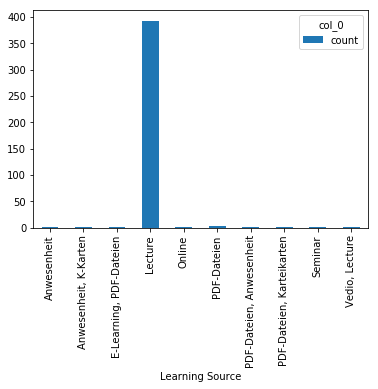

In [7]:
my_tab = pd.crosstab(index = train_data["Learning Source"],  # Make a crosstab
                              columns="count")
my_tab.plot.bar()

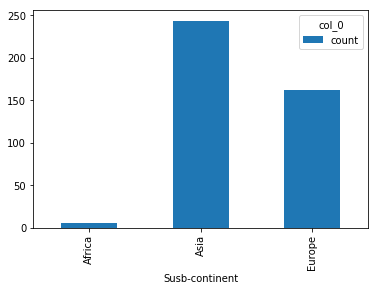

In [8]:
my_tab = pd.crosstab(index = train_data["Susb-continent"],  # Make a crosstab
                              columns="count")
my_tab.plot.bar()

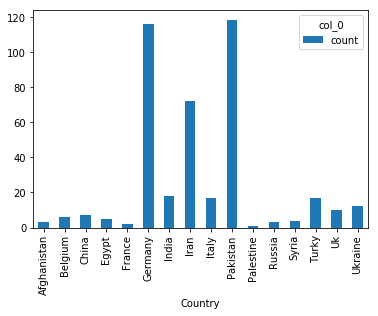

In [31]:
my_tab = pd.crosstab(index = train_data["Country"],  # Make a crosstab
                              columns="count")
my_tab.plot.bar()

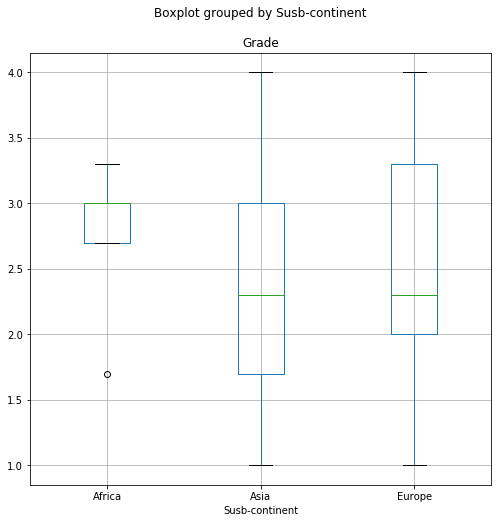

In [9]:
is_not_nan =  train_data['Grade'].str.lower()!= 'nan'
filter_train_data = train_data[is_not_nan]
filter_train_data.Grade = filter_train_data['Grade'].str.replace(',','.').values.astype(np.float)
filter_train_data.boxplot(column="Grade",by= "Susb-continent",         # Column to split upon
                 figsize= (8,8))

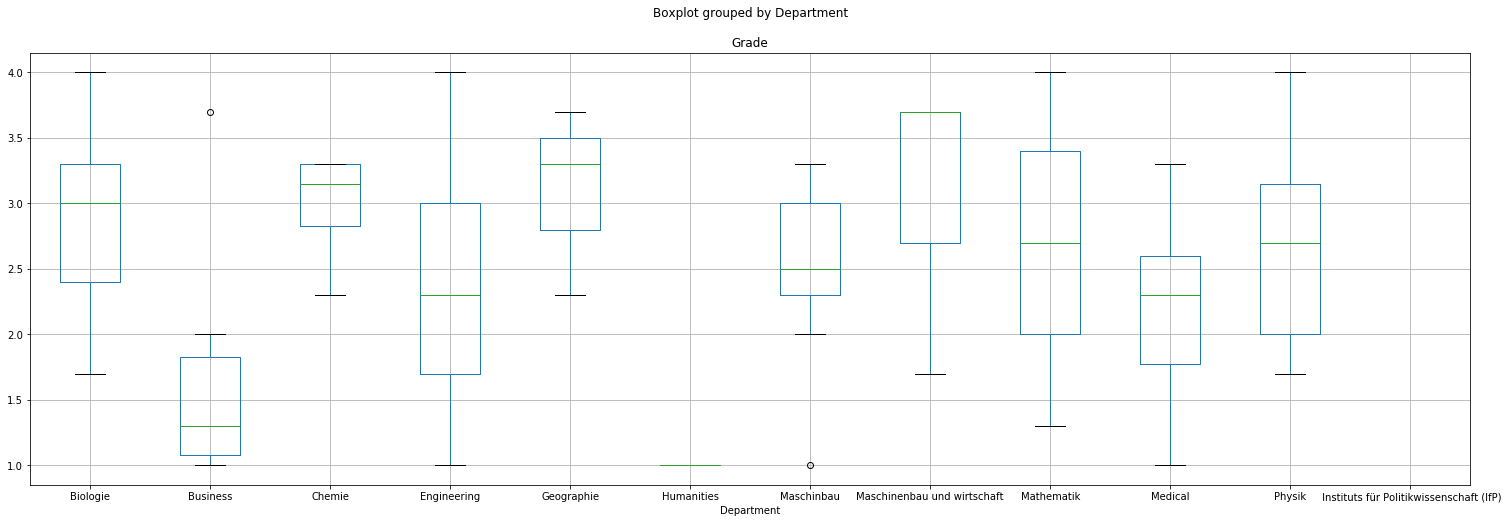

In [33]:
is_not_nan =  train_data['Grade'].str.lower()!= 'nan'
filter_train_data = train_data[is_not_nan]
filter_train_data.Grade = filter_train_data['Grade'].str.replace(',','.').values.astype(np.float)
filter_train_data.boxplot(column="Grade",by= "Department",         # Column to split upon
                 figsize= (25,8))

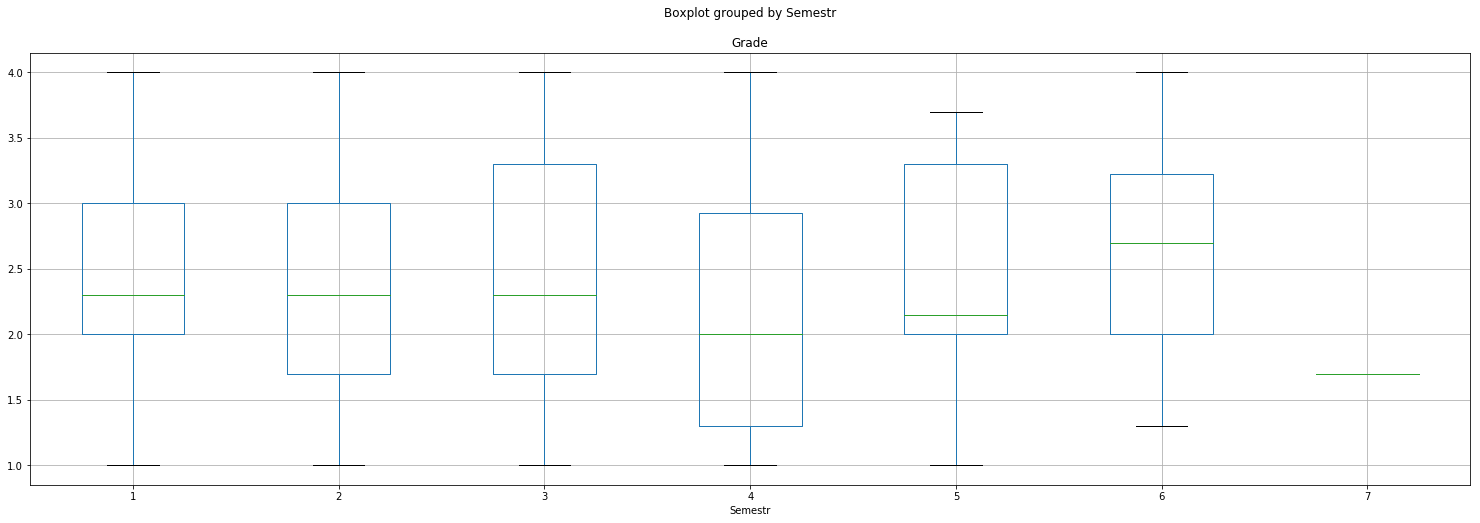

In [34]:
is_not_nan =  train_data['Grade'].str.lower()!= 'nan'
filter_train_data = train_data[is_not_nan]
filter_train_data.Grade = filter_train_data['Grade'].str.replace(',','.').values.astype(np.float)
filter_train_data.boxplot(column="Grade",by= "Semestr",         # Column to split upon
                 figsize= (25,8))

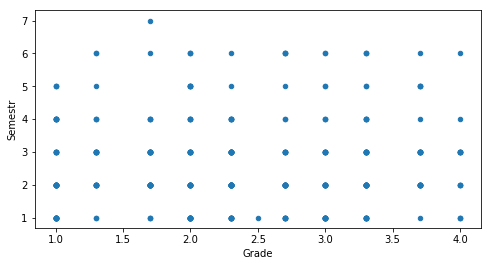

In [35]:
is_not_nan =  train_data['Grade'].str.lower()!= 'nan'
filter_train_data = train_data[is_not_nan]
filter_train_data.Grade = filter_train_data['Grade'].str.replace(',','.').values.astype(np.float)
filter_train_data.Semestr = filter_train_data['Semestr'].values.astype(np.int32)
filter_train_data.plot.scatter(x='Grade', y='Semestr',         # Column to split upon
                 figsize= (8,4))

## Do train the model

In [10]:
input_data = train_data[[ 'Semestr', 'Department', 'Sub-Department ', 'Subject',
        'Learning Source',  'Susb-continent', 'Country']].values

In [11]:
enc = OneHotEncoder(handle_unknown='ignore')
input_data_enc = enc.fit_transform(input_data).toarray()


In [12]:
grades = train_data['Grade'].str.lower().values
labels = []
for i,x in enumerate(grades):
    if x == "" or str(x).lower() == 'nan':
        labels.append(train_data['Evaluation'].str.strip().values[i].lower())
    elif float(str(x).replace(',','.')) > 2.5:
        labels.append('bad')
    elif float(str(x).replace(',','.')) <= 2.5:
        labels.append('good')
le = LabelEncoder()
enc_labels = le.fit_transform(labels)

In [13]:
Counter(labels)

Counter({'good': 240, 'bad': 171})

In [14]:
X_train, X_test, y_train, y_test = train_test_split(input_data_enc, 
                                                    enc_labels, stratify=enc_labels, 
                                                    random_state=0, test_size=0.20)

In [15]:
rus = RandomUnderSampler(random_state=0)
X_train, y_train = rus.fit_sample(X_train, y_train)

In [16]:
def plot_roc(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
def print_scores(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(y_pred[:10])
    print(y_test[:10])
    print('Precision score: {:3f}'.format(precision_score(y_test, y_pred, average='macro') ))
    print('Recall score: {:3f}'.format(recall_score(y_test, y_pred, average='macro') ))
    print('F1 score: {:3f}'.format(f1_score(y_test, y_pred, average='macro')))
    print('AUC score: {:3f}'.format(roc_auc_score(y_test, y_pred)))
    print('Confusion Metric : %s' %(confusion_matrix(y_test, y_pred)))
    print('Prediction Accuracy: {:3f}'.format(accuracy_score(y_test, y_pred)))

[0 0 1 1 1 0 0 1 1 1]
[1 1 0 1 1 1 0 1 1 1]
Precision score: 0.568155
Recall score: 0.568155
F1 score: 0.554217
AUC score: 0.568155
Confusion Metric : [[23 12]
 [25 23]]
Prediction Accuracy: 0.554217


/usr/local/anaconda3/envs/mlib_demo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


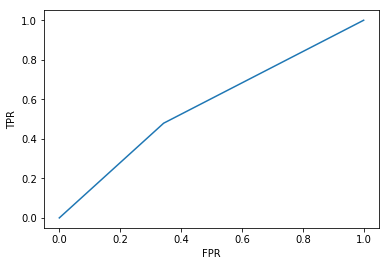

In [17]:
lr = LogisticRegression()
print_scores(lr, X_train, y_train, X_test, y_test)
plot_roc(lr, X_test, y_test)

[0 0 1 1 1 0 0 1 1 0]
[1 1 0 1 1 1 0 1 1 1]
Precision score: 0.516981
Recall score: 0.516071
F1 score: 0.492133
AUC score: 0.516071
Confusion Metric : [[23 12]
 [30 18]]
Prediction Accuracy: 0.493976


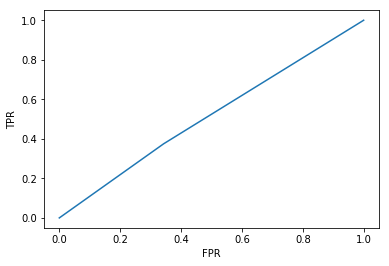

In [18]:
knn = KNeighborsClassifier()
print_scores(knn, X_train, y_train, X_test, y_test)
plot_roc(knn, X_test, y_test)

[0 0 0 1 1 0 1 1 1 1]
[1 1 0 1 1 1 0 1 1 1]
Precision score: 0.598485
Recall score: 0.596726
F1 score: 0.578068
AUC score: 0.596726
Confusion Metric : [[25 10]
 [25 23]]
Prediction Accuracy: 0.578313


/usr/local/anaconda3/envs/mlib_demo/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


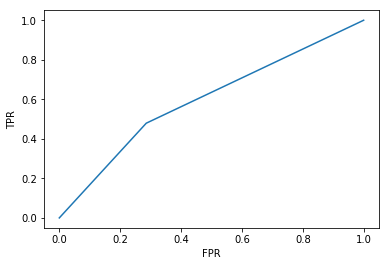

In [19]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)
print_scores(rf, X_train, y_train, X_test, y_test)
plot_roc(rf, X_test, y_test)

[0 0 0 1 0 0 0 0 1 1]
[1 1 0 1 1 1 0 1 1 1]
Precision score: 0.646032
Recall score: 0.609524
F1 score: 0.551621
AUC score: 0.609524
Confusion Metric : [[31  4]
 [32 16]]
Prediction Accuracy: 0.566265


/usr/local/anaconda3/envs/mlib_demo/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/anaconda3/envs/mlib_demo/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


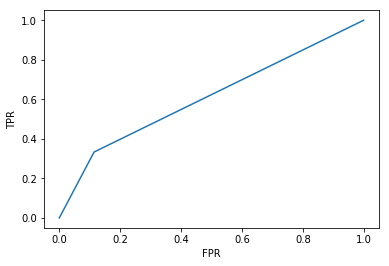

In [20]:
svc = SVC().fit(X_train, y_train)
print_scores(svc, X_train, y_train, X_test, y_test)

plot_roc(svc, X_test, y_test)

## Do some prediction

In [21]:
input_to_predict = np.array(['2','Engineering','Computer Enginnering','Advanced Web Tech','Online','Asia','Pakistan'])

In [22]:
one_hot_pred = enc.transform([input_to_predict]).toarray()

In [23]:
print('good' if lr.predict(one_hot_pred)[0] == 1 else 'bad')

good


In [61]:
train_data.to_csv('final_data.csv', sep=',')